In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
with open('../embeddings/rdkit_raw_esm3_embeddings_casf_2016.json', 'r') as file:
    pdbbind_data = json.load(file)

with open('../embeddings/protein-ligand-dengue-cut-normalized-rdkit-raw.json', 'r') as file:
    dengue_data = json.load(file)



In [3]:
with open('/p/lustre1/ranganath2/fast.tmp/PDBBIND2020/EGNN-20240819-174309-871564-clrte403/pdbbind2020_test/cosine.json', 'r') as file:
    pdbbind_result = json.load(file)

with open('/p/lustre1/ranganath2/fast.tmp/PDBBIND2020/EGNN-20240819-174309-871564-clrte403/denv2_test/cosine.json', 'r') as file:
    dengue_zero_result = json.load(file)

In [4]:
from collections import defaultdict
dengue_key_sorted = defaultdict(list)
for key, value in dengue_zero_result.items():
    key = key.split('_')[0]
    dengue_key_sorted[key].append(np.linalg.norm(value))

for key, value in dengue_key_sorted.items():
    dengue_key_sorted[key] = sum(value)/len(value)

In [8]:
dengue_key_sorted.values()

dict_values([7348.944914087961, 2801.334630433081, 8733.631212586977, 6424.783048906041, 941.9199742476023, 6253.067707553182, 346.32039466550697, 6224.679626659357, 1959.3132286717234, 4096.585402207885, 7104.509393179428, 5535.91075456206, 6027.755838430421, 8767.250443554183, 5039.4361173309935, 3812.8285684770176, 6511.503833970231, 5455.968845189169, 7946.045954861935, 1830.2075990804738, 7723.341361004396, 883.965872193846, 9072.769653396565, 4765.075717442725, 3077.3118067082028, 886.0765873615092, 7318.170500877219, 7723.346053096441, 1521.0106463096636, 8010.254453680941, 1781.78420556199, 2659.3682594374536, 6453.623967952698, 6367.284886483794, 6168.087748218944, 6657.321992388615, 5589.531086400593, 5039.436648379054, 5388.497049365856, 8042.466853777298, 3170.2517707082857, 1970.9804397545217, 1446.537040728042, 884.6092239927077, 6482.534147672084, 923.8786832981557, 6453.620407960925, 4076.83272517899, 8042.464203709741, 3642.5421588790305, 7410.705401354266, 2456.820554

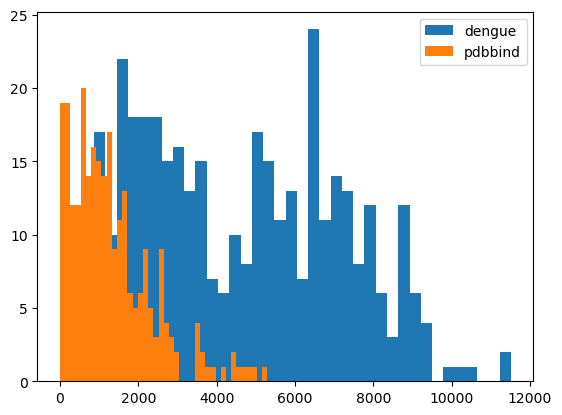

In [9]:
pdbbind_grads = [np.linalg.norm(pdbbind_result[key]) for key in pdbbind_result]
dengue_grads = [np.linalg.norm(dengue_key_sorted[key]) for key in dengue_key_sorted]
plt.hist(dengue_grads, bins=40, label='dengue')
plt.hist(pdbbind_grads, bins=40, label = 'pdbbind')
plt.legend(loc='upper right')
plt.show()

In [13]:
dists = {}

import pandas as pd
# Scatter plot Gradient vs pdbbind_data
file = '../data/dengue/denv2/protease_ligand_prep.csv'
df = pd.read_csv(file)

for dengue_id,deng_value in dengue_data.items():
    for pdb_id,pdb_value in pdbbind_data.items():
        d_id = df[df['compound_id']==int(float(dengue_id))]['id'].iloc[0]
        comb_id = (pdb_id,d_id)
        dist = np.linalg.norm(np.array(deng_value[1]) - np.array(pdb_value[1]))
        if dist<0.35:
            dists[comb_id] = dist


In [14]:
len(dists.keys())

75278

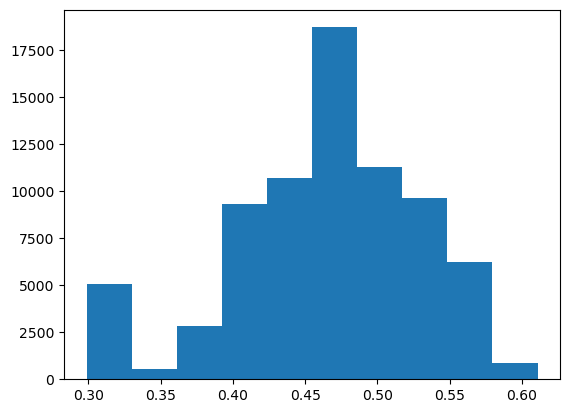

In [15]:
plt.hist([dist for _,dist in dists.items()])
plt.show()

In [23]:
dengue_grads = []
seen = set()
selected_keys = []
for key, values in dists.items():
    ids = [str(key[1])+'_'+str(i+1) for i in range(20)]
    for id in ids:
        if id in dengue_zero_result and id not in seen:
            if np.linalg.norm(dengue_zero_result[id]) < 2000:
                dengue_grads.append(np.linalg.norm(dengue_zero_result[id]))
                selected_keys.append(id)
            seen.add(id)

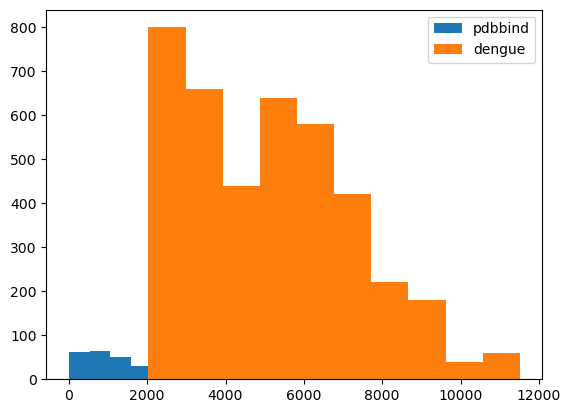

In [22]:
# dengue_grads = [dengue_grad for dengue_grad in dengue_grads if dengue_grad>2000]
plt.hist(pdbbind_grads, label='pdbbind')
plt.hist(dengue_grads, label='dengue')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Now load the data from dengue
with open('/p/lustre1/ranganath2/fast.tmp/DENV2/EGNN-20240821-133932-872236-16ci7qwd-RANDOM-FINETUNE/denv2_test/cosine.json') as f:
    dengue_result = json.load(f)

In [ ]:
dengue_new_grads = []
for selected_key in selected_keys:
    dengue_new_grads.append(np.linalg.norm(dengue_result[selected_key]))

plt.hist(dengue_new_grads, label='dengue')
plt.hist(pdb_grads, label='pdbbind')
plt.legend(loc='upper right')
plt.show()